#Mulitple Linear Regression

#Problem Statement
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market.

 **The company wants to know**

1. Which variables are significant in predicting the demand for shared bikes.
2.How  well those variables describe the bike demands



Importing library

In [45]:
import pandas as pd
import numpy as np
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

#Reading the dataset

In [46]:
df_bike = pd.read_csv('day.csv')
df_bike

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


# Inspect the various aspects of the dataframe

In [47]:
df_bike.shape

(730, 16)

So the datafram have 730 rows and 16 columns

In [48]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [49]:
df_bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


To check whethere there is any null value present in dataset

In [50]:
df_bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

From above We can see that there is no null value in the dataset.

**Performing Data Cleaning on Dataframe**

Dropping the following columns as its not contributing anything for Data analysis

1.instant - It is telling about the index

2.causal & registered - Both these columns contains the count of bike booked by different categories of customers.So we can drop this common

3.dteday : This column has date. Since, we already have separate year and month column, So we can drop this column.

In [51]:
#dropping the above columns
df_bike.drop(['instant'],axis=1,inplace=True)

In [52]:
df_bike.drop(['casual'],axis=1,inplace=True)
df_bike.drop(['registered'],axis=1,inplace=True)

In [53]:
df_bike.drop(['dteday'],axis=1,inplace=True)

In [54]:
#After dropping above columns lets check the reamining dataset
df_bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [55]:
df_bike.shape

(730, 12)

Now we have 730 rows and 12 columns remained

In [56]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [57]:
df_bike.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [58]:
# to find the unique values
df_bike.nunique() #gives info about unique values present in data

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

In [59]:
df_bike.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [60]:
df_bike1 =df_bike[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']]

In [61]:
df_bike1.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [62]:
df_bike1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


#Step 2: Visualising the Data
Let's now spend some time doing what is arguably the most important step - understanding the data.

If there is some obvious multicollinearity going on, this is the first place to catch it
Here's where you'll also identify if some predictors directly have a strong association with the outcome variable
We'll visualise our data using matplotlib and seaborn.

#Visualising Numeric Variables
Let's make a pairplot of all the numeric variables

<Figure size 1500x3000 with 0 Axes>

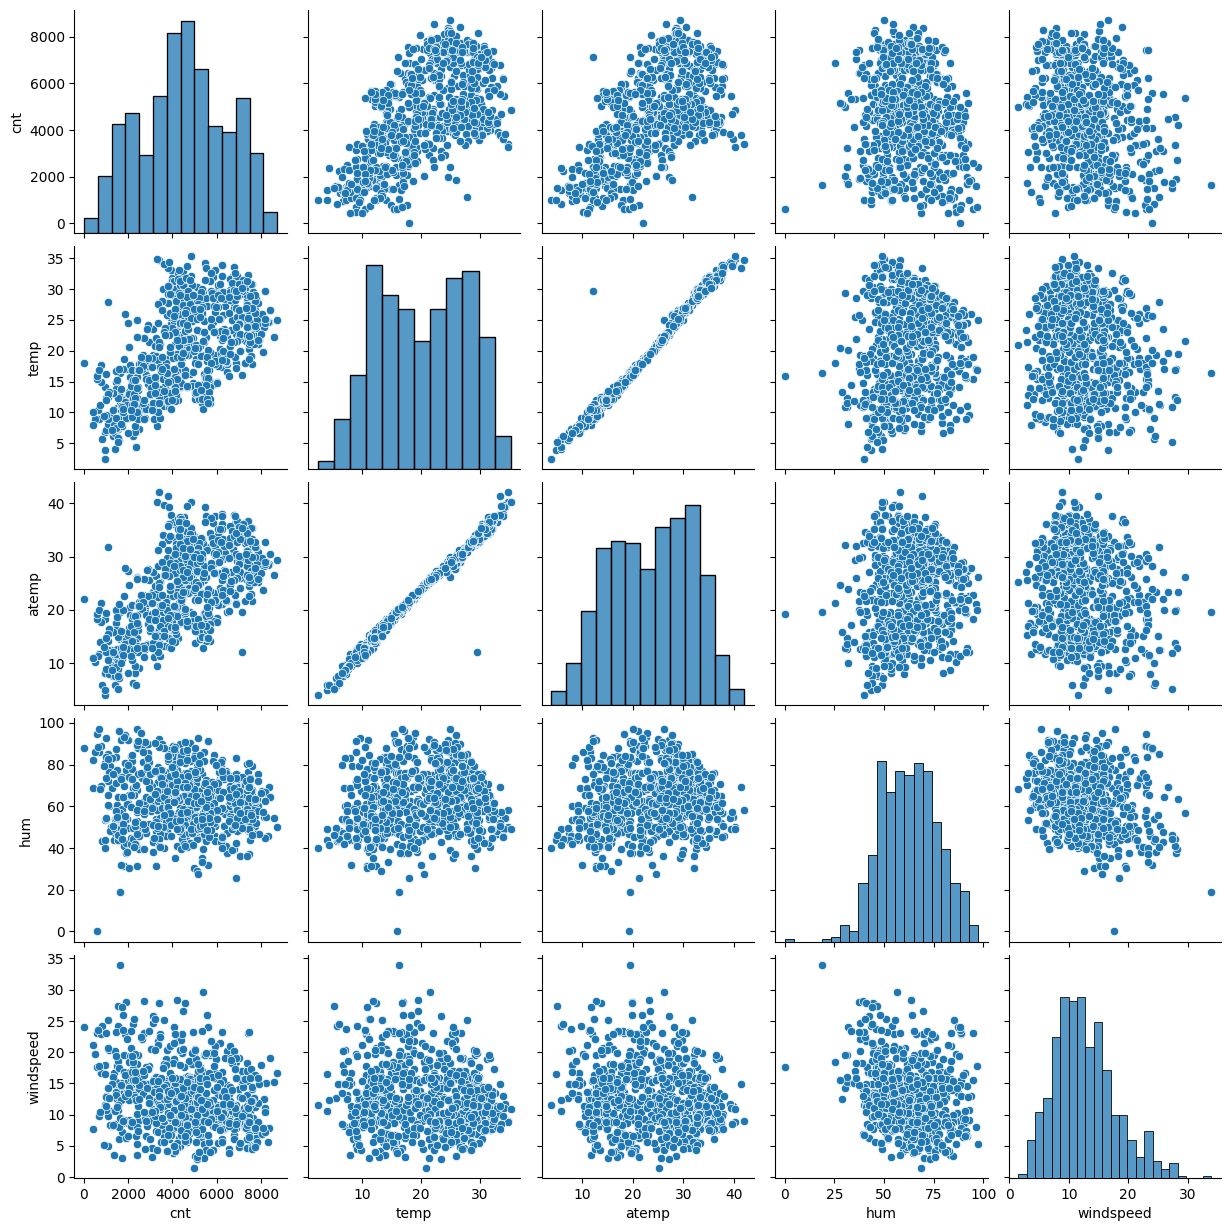

In [63]:
plt.figure(figsize = (15,30))
sns.pairplot(data=df_bike1, vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

From the above plots we can clearly see that temp and atemp are having high correlation.

There is linear relationship between temp and atemp. Both of the parameters cannot be used in the model due to multicolinearity. We will decide which parameters to keep based on VIF and p-value w.r.t other variables

Now Lets visualize the categorical variable using boxplots

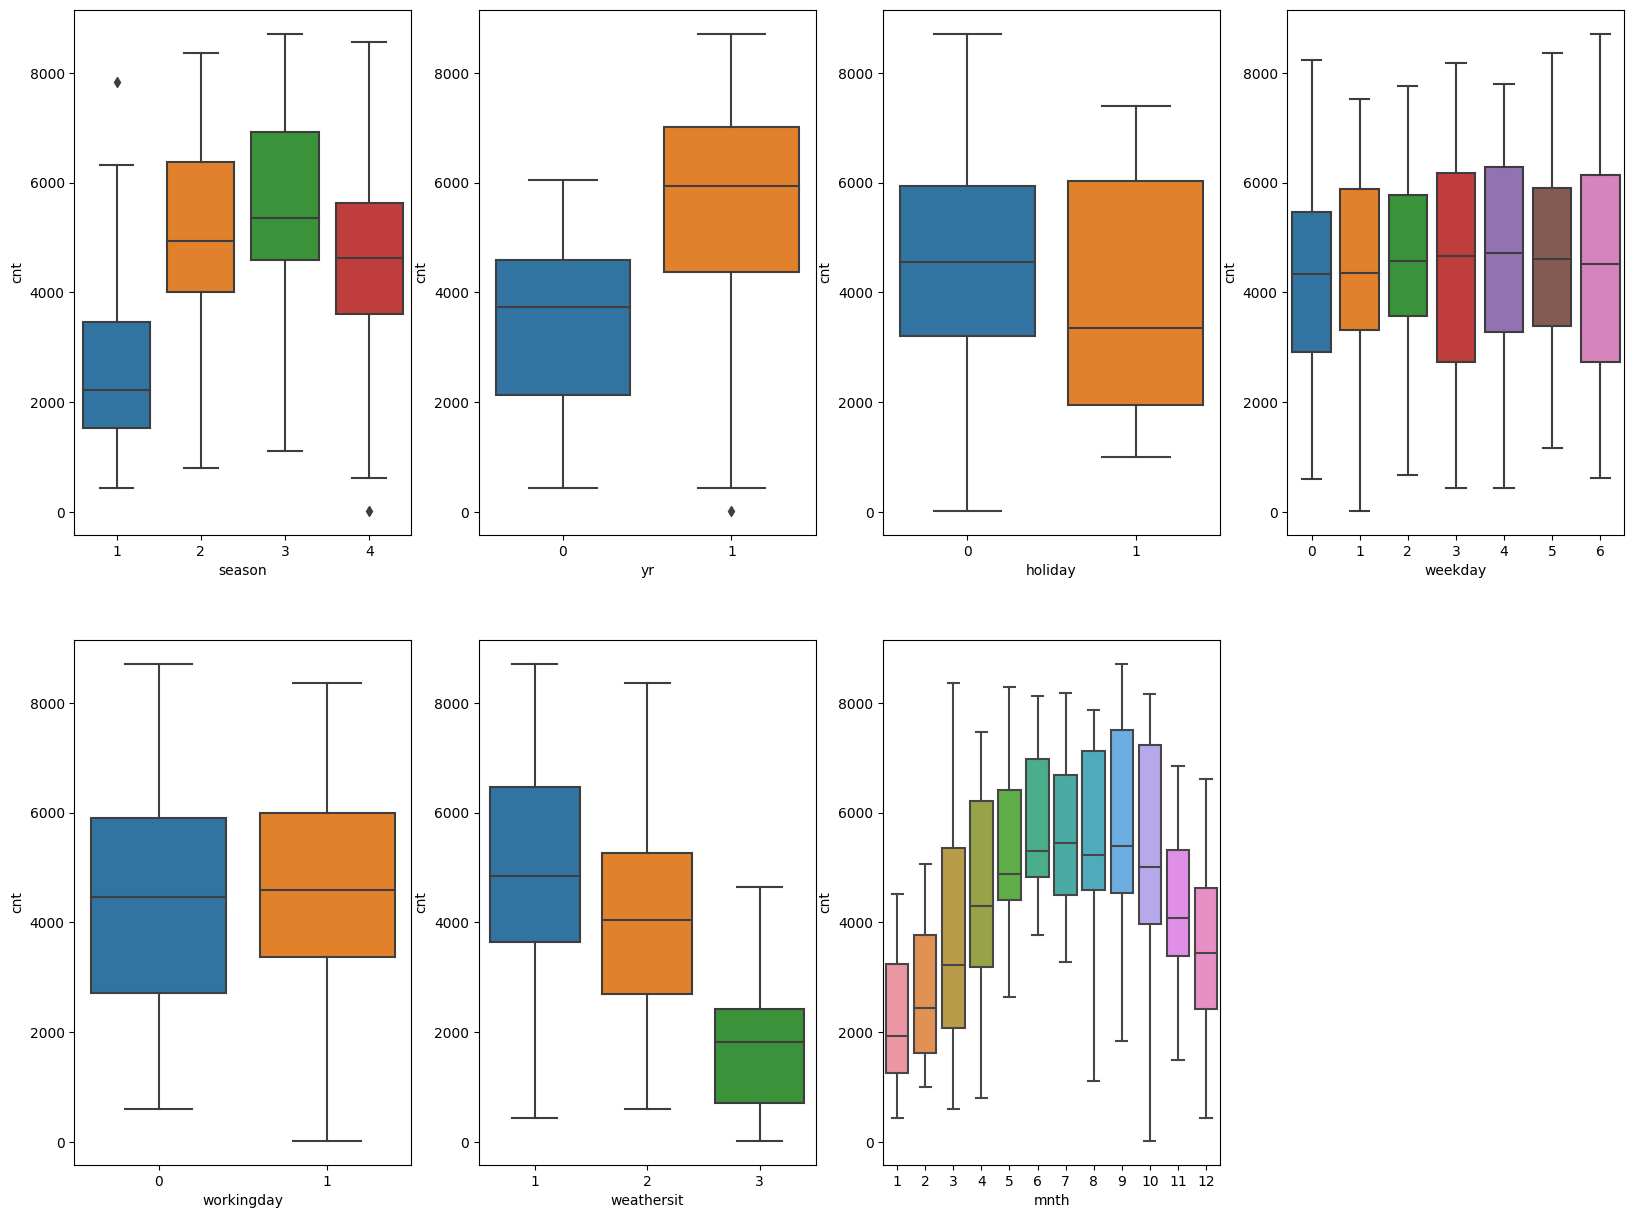

In [64]:
plt.figure(figsize=(20, 15))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = df_bike1)
plt.subplot(2,4,2)
sns.boxplot(x = 'yr', y = 'cnt', data = df_bike1)
plt.subplot(2,4,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = df_bike1)
plt.subplot(2,4,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = df_bike1)
plt.subplot(2,4,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = df_bike1)
plt.subplot(2,4,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df_bike1)
plt.subplot(2,4,7)
sns.boxplot(x = 'mnth', y = 'cnt', data = df_bike1)
plt.show()

From above plots we can clearly say that

1.Season - For the variable season, we can clearly see that the category 3: Fall, has the highest median, which shows that the demand was high during this season. It is least for 1: spring.

2.Yr - The year 2019 had a higher count of users as compared to the year 2018.

3.Holiday - rentals reduced during holiday.

4..Weekday - The bike demand is almost constant throughout the week.

5.Workingday – From the "Workingday" boxplot we can see those maximum bookings happening,that is the median count of users is constant almost  throughout the week. There is not much of difference in booking whether its working day or not.

6.Weathersit - There are no users when there is heavy rain/ snow indicating that this weather is quite adverse. Highest count was seen when the weather situation was clear,Partly Cloudy.

7.Mnth - The number of rentals peaked in September This observation is consistent with the observation made regarding the weather.

As a result of the typical substanial snowfall in December, rentals may have declined.

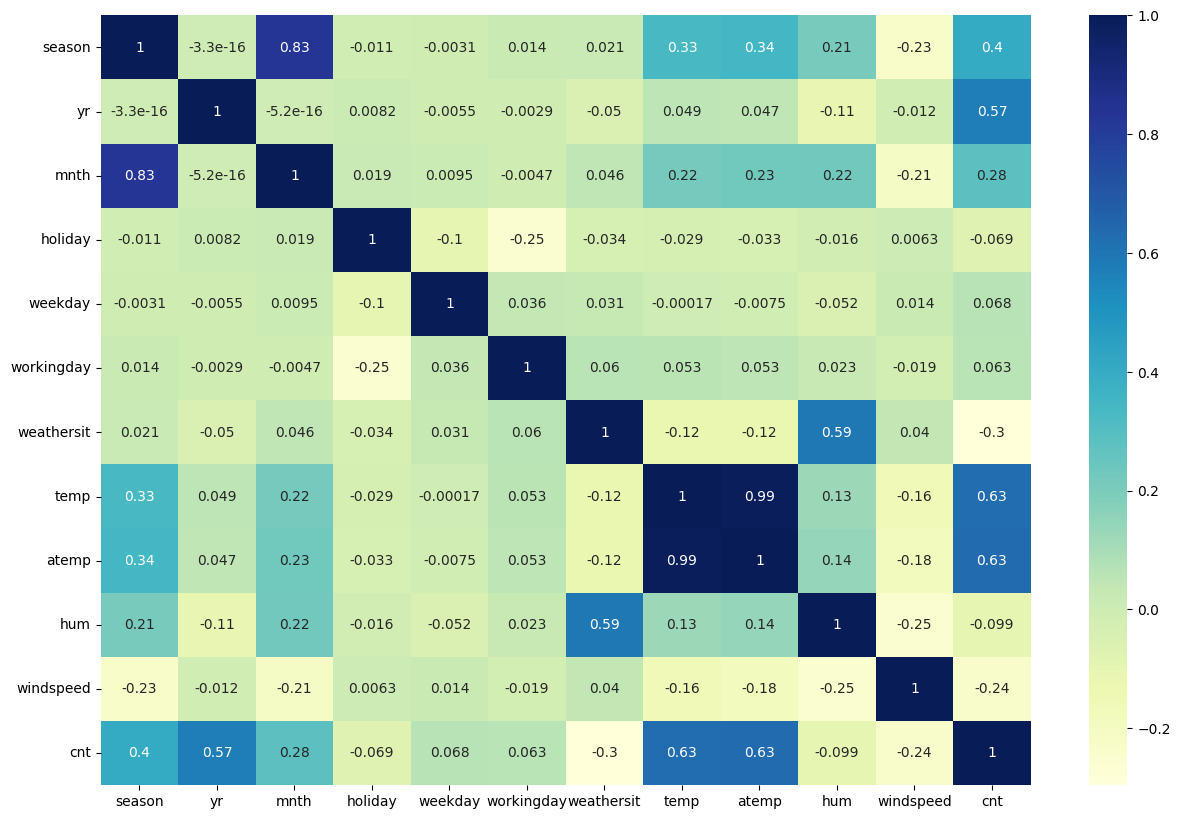

In [65]:
#Heatmap for correlation between numeric variables
plt.figure(figsize=(15,10))
sns.heatmap(df_bike1.corr(),cmap="YlGnBu",annot=True)
plt.show()

#Step 3: Data Preparation
Mapping the categorical values to their respective categorical string values (reference data dictionary)

In [67]:
df_bike1

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,2114
726,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,3095
727,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,1341
728,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,1796


In [68]:
#Mapping Weekday
df_bike1.weekday = df_bike1.weekday.map({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thrusday",5:"Friday",6:"Saturday"})




In [70]:
# Maping seasons
df_bike1.season = df_bike1.season.map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})
# Mapping weathersit
df_bike1.weathersit = df_bike1.weathersit.map({1:'Clear',2:'Mist & Cloudy',3:'Light Snow & Rain',4:'Heavy Snow & Rain'})

In [71]:
#mapping month
df_bike1.mnth = df_bike1.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

In [72]:
df_bike1

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,jan,0,Saturday,0,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,jan,0,Sunday,0,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,Spring,1,dec,0,Thrusday,1,Mist & Cloudy,10.420847,11.33210,65.2917,23.458911,2114
726,Spring,1,dec,0,Friday,1,Mist & Cloudy,10.386653,12.75230,59.0000,10.416557,3095
727,Spring,1,dec,0,Saturday,0,Mist & Cloudy,10.386653,12.12000,75.2917,8.333661,1341
728,Spring,1,dec,0,Sunday,0,Clear,10.489153,11.58500,48.3333,23.500518,1796


**Creating Dummy variable**

We will create Dummy variables for these 4 categorical variables- mnth, weekday, season & weathersit.

In [74]:
# Get the dummy variables for the features ''season','mnth','weekday','weathersit'' and store it in a new variable - 'dummy'
dummy = df_bike1[['season','mnth','weekday','weathersit']]

In [75]:
dummy = pd.get_dummies(dummy,drop_first=True)

In [76]:
# Adding the dummy variables to the original dataset
df_bike1 = pd.concat([dummy,df_bike1],axis = 1)

In [77]:
#Now Let see the dataset
df_bike1.head()

,season_Spring,season_Summer,season_Winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,...,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,jan,0,Saturday,0,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,jan,0,Sunday,0,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


As we have created dummy variable for 4 columns 'season' , 'mnth' ,'weekday' , 'weathersit' .Lets drop this 4 columns

In [78]:
#Deleting the orginal columns season.weathersit,weekday,mnth

df_bike1.drop(['season', 'weathersit', 'weekday', 'mnth'],axis=1,inplace=True)

df_bike1.head()

,season_Spring,season_Summer,season_Winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [79]:
df_bike1.shape

(730, 30)

In [80]:
df_bike1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   season_Spring                 730 non-null    uint8  
 1   season_Summer                 730 non-null    uint8  
 2   season_Winter                 730 non-null    uint8  
 3   mnth_aug                      730 non-null    uint8  
 4   mnth_dec                      730 non-null    uint8  
 5   mnth_feb                      730 non-null    uint8  
 6   mnth_jan                      730 non-null    uint8  
 7   mnth_jul                      730 non-null    uint8  
 8   mnth_jun                      730 non-null    uint8  
 9   mnth_mar                      730 non-null    uint8  
 10  mnth_may                      730 non-null    uint8  
 11  mnth_nov                      730 non-null    uint8  
 12  mnth_oct                      730 non-null    uint8  
 13  mnth_

In [81]:
df_bike1.describe()

,season_Spring,season_Summer,season_Winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.246575,0.252055,0.243836,0.084932,0.084932,0.076712,0.084932,0.084932,0.082192,0.084932,...,0.028767,0.336986,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.431313,0.434490,0.429689,0.278971,0.278971,0.266317,0.278971,0.278971,0.274845,0.278971,...,0.167266,0.473004,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


#Step 4: Splitting the Data into Training and Testing Sets
The first basic step for regression is performing a train-test split.

In [82]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(df_bike1, train_size = 0.7, random_state = 100)

In [83]:
print(X_train.shape)
print(X_test.shape)

(510, 30)
(220, 30)


#Step 5: Rescaling the Features
We use Min-Max scaling

In [84]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [85]:
# Apply scaler() to all the columns except the 'dummy' variables.
num_vars = ['cnt','hum','windspeed','temp','atemp']

X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [86]:
X_train.head()

,season_Spring,season_Summer,season_Winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
576,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658
426,1,0,0,0,0,0,0,0,0,1,...,0,1,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255
728,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096
482,0,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973
111,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095


In [87]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 576 to 520
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   season_Spring                 510 non-null    uint8  
 1   season_Summer                 510 non-null    uint8  
 2   season_Winter                 510 non-null    uint8  
 3   mnth_aug                      510 non-null    uint8  
 4   mnth_dec                      510 non-null    uint8  
 5   mnth_feb                      510 non-null    uint8  
 6   mnth_jan                      510 non-null    uint8  
 7   mnth_jul                      510 non-null    uint8  
 8   mnth_jun                      510 non-null    uint8  
 9   mnth_mar                      510 non-null    uint8  
 10  mnth_may                      510 non-null    uint8  
 11  mnth_nov                      510 non-null    uint8  
 12  mnth_oct                      510 non-null    uint8  
 13  mnt

In [88]:
X_train.describe()

,season_Spring,season_Summer,season_Winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.243137,0.247059,0.247059,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,...,0.029412,0.345098,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499
std,0.429398,0.431725,0.431725,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,...,0.169124,0.475867,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


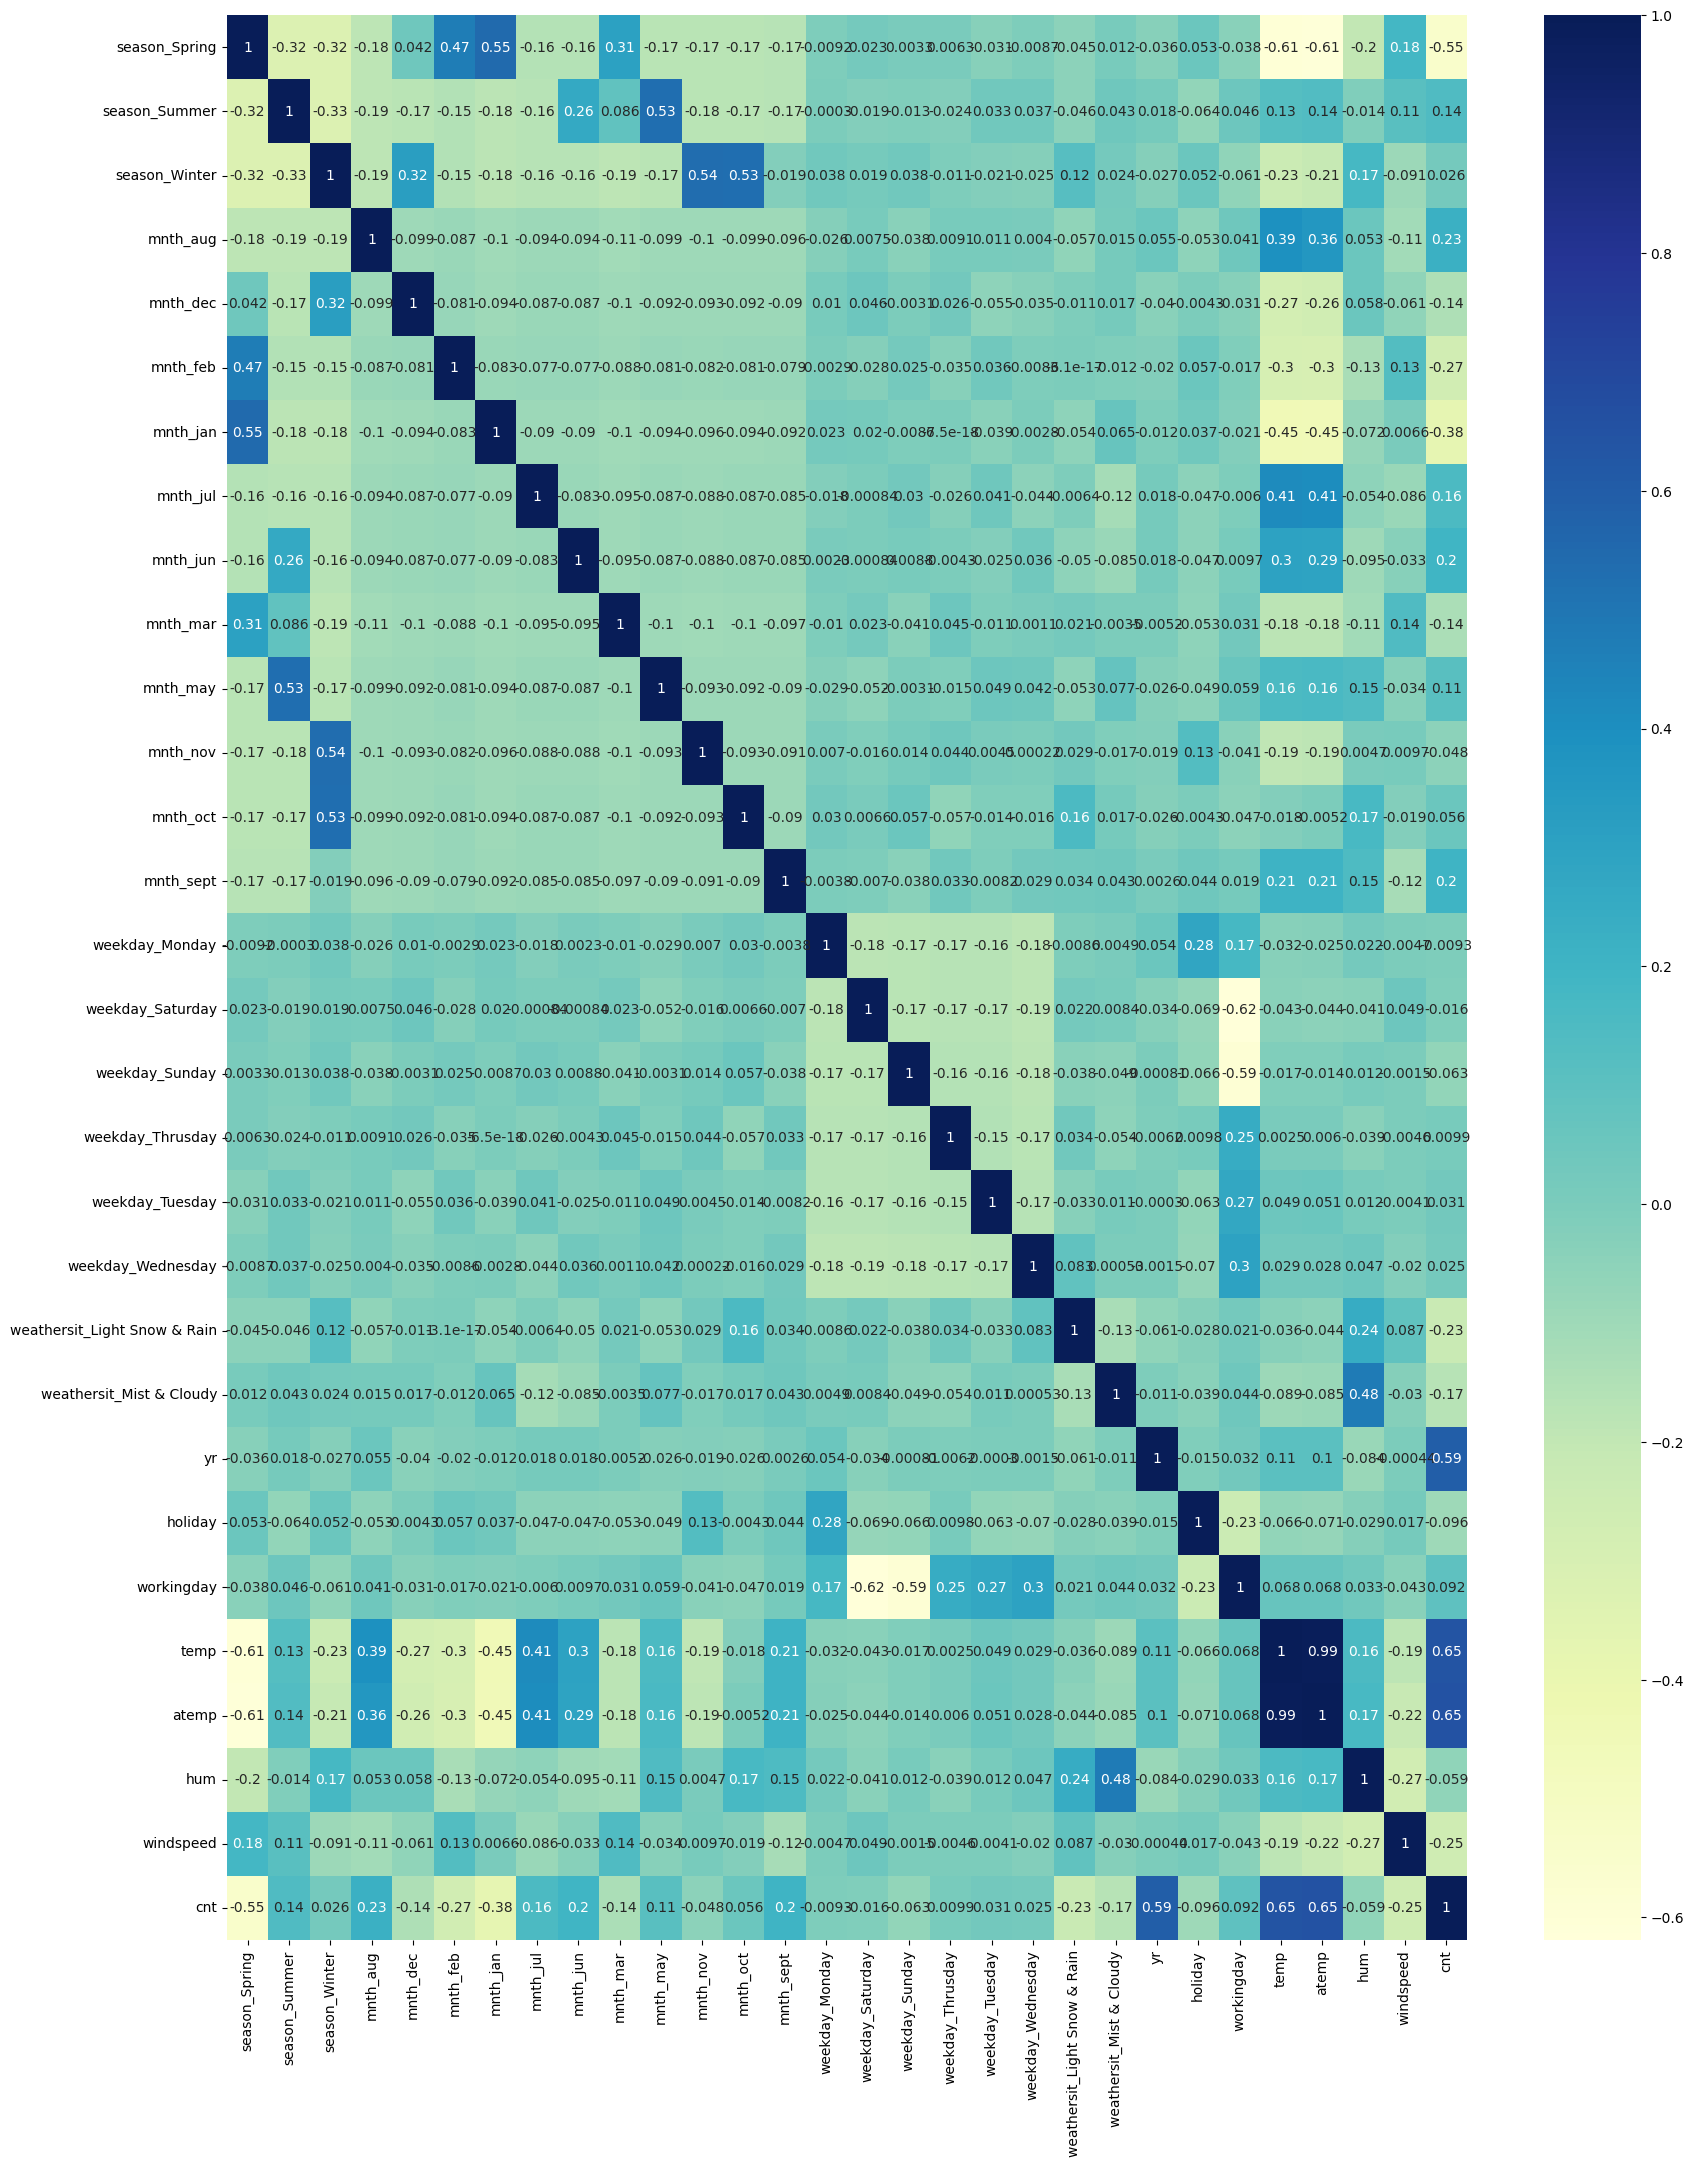

In [89]:
#Checking the coefficients to see which variables are highly correlated
plt.figure(figsize = (20, 25))
sns.heatmap(X_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

**Dividing into X and Y sets for the model building**

In [90]:
#Dividing into X and Y sets for the model building
y_train = X_train.pop('cnt')

In [91]:
y_train.shape

(510,)

#Building our model
This time, we will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

#RFE
Recursive feature elimination

In [92]:
# Importing RFE and LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [93]:
# Running RFE with the output number of the variable equal to 15

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train)

In [94]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('mnth_aug', False, 10),
 ('mnth_dec', False, 3),
 ('mnth_feb', False, 4),
 ('mnth_jan', True, 1),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 15),
 ('mnth_mar', False, 14),
 ('mnth_may', False, 7),
 ('mnth_nov', False, 2),
 ('mnth_oct', False, 12),
 ('mnth_sept', True, 1),
 ('weekday_Monday', False, 9),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', False, 6),
 ('weekday_Thrusday', False, 13),
 ('weekday_Tuesday', False, 8),
 ('weekday_Wednesday', False, 11),
 ('weathersit_Light Snow & Rain', True, 1),
 ('weathersit_Mist & Cloudy', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [95]:
col = X_train.columns[rfe.support_]
col

Index(['season_Spring', 'season_Summer', 'season_Winter', 'mnth_jan',
       'mnth_jul', 'mnth_sept', 'weekday_Saturday',
       'weathersit_Light Snow & Rain', 'weathersit_Mist & Cloudy', 'yr',
       'holiday', 'workingday', 'temp', 'hum', 'windspeed'],
      dtype='object')

In [96]:
X_train.columns[~rfe.support_]

Index(['mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jun', 'mnth_mar', 'mnth_may',
       'mnth_nov', 'mnth_oct', 'weekday_Monday', 'weekday_Sunday',
       'weekday_Thrusday', 'weekday_Tuesday', 'weekday_Wednesday', 'atemp'],
      dtype='object')

In [97]:
# Creating X_train dataframe with RFE selected variables

X_train_rfe = X_train[col]

Adding a constant variable For statsmodels, we need to explicitly fit a constant using sm because by default its don't add constant.

In [99]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_rfe)

In [100]:
X_train_lm.head()

,const,season_Spring,season_Summer,season_Winter,mnth_jan,mnth_jul,mnth_sept,weekday_Saturday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,hum,windspeed
576,1.0,0,0,0,0,1,0,0,0,0,1,0,1,0.815169,0.725633,0.264686
426,1.0,1,0,0,0,0,0,1,0,1,1,0,0,0.442393,0.640189,0.255342
728,1.0,1,0,0,0,0,0,0,0,0,1,0,0,0.245101,0.498067,0.663106
482,1.0,0,1,0,0,0,0,1,0,1,1,0,0,0.395666,0.504508,0.188475
111,1.0,0,1,0,0,0,0,0,0,1,0,0,1,0.345824,0.751824,0.380981


#Building the first linear models using statsmodels

In [101]:
lmodel_1 = sm.OLS(y_train, X_train_lm).fit()
lmodel_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Mon, 27 Nov 2023   Prob (F-statistic):          4.22e-191
Time:                        13:18:49   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.2519      0.036      6.969      0.000       0.181       0.323
season_Spring                   -0.0509      0.021     -2.464      0.014      -0.091      -0.010
season_Summer                    0.0508      0.015      3.423      0.001       0.022       0.080
season_Winter                    0.0933      0.017      5.403      0.000       0.059       0.127
mnth_jan                        -0.0345      0.017     -1.989      0.047      -0.069      -0.000
mnth_jul                        -0.0529      0.018     -2.931      0.004      -0.088      -0.017
mnth_sept                        0.0814      0.016      4.945      0.000       0.049       0.114
weekday_Saturday                 0.0536      0.014      3.694      0.000       0.025       0.082
weathersit_Light Snow & Rain    -0.2475      0.026     -9.507      0.000      -0.299      -0.196
weathersit_Mist & Cloudy        -0.0563      0.010     -5.439      0.000      -0.077      -0.036
yr                               0.2305      0.008     28.795      0.000       0.215       0.246
holiday                         -0.0582      0.027     -2.164      0.031      -0.111      -0.005
workingday                       0.0433      0.012      3.762      0.000       0.021       0.066
temp                             0.5096      0.034     14.837      0.000       0.442       0.577
hum                             -0.1563      0.037     -4.188      0.000      -0.230      -0.083
windspeed                       -0.1863      0.025     -7.310      0.000      -0.236      -0.136
==============================================================================
Omnibus:                       66.260   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.826
Skew:                          -0.678   Prob(JB):                     1.97e-35
Kurtosis:                       5.383   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Here we see that the p-value for all the variables is < 0.05 . Hence, we keep all the columns and check VIF.

Checking VIF for multicollinearity Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model

In [102]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [103]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [round(variance_inflation_factor(X_train_rfe.values, i), 2) for i in range(X_train_rfe.shape[1])]

vif.sort_values(by = 'VIF', ascending=False)

,Features,VIF
13,hum,29.37
12,temp,17.78
11,workingday,5.31
14,windspeed,4.73
0,season_Spring,4.53
2,season_Winter,3.46
1,season_Summer,2.85
8,weathersit_Mist & Cloudy,2.29
9,yr,2.09
6,weekday_Saturday,1.98


In general we want VIF to be less than 5. We will drop feature hum which has highest VIF of 29.37

In [104]:
# dropping season_Spring since its vif > 5

X_train_rfe = X_train_rfe.drop(['hum'], axis=1)

#Building model 2

In [105]:
X_train_lm = sm.add_constant(X_train_rfe)
lmodel_2 = sm.OLS(y_train, X_train_lm).fit()
lmodel_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Mon, 27 Nov 2023   Prob (F-statistic):          1.60e-188
Time:                        13:24:37   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     495   BIC:                            -928.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.1737      0.031      5.520      0.000       0.112       0.235
season_Spring                   -0.0599      0.021     -2.867      0.004      -0.101      -0.019
season_Summer                    0.0445      0.015      2.967      0.003       0.015       0.074
season_Winter                    0.0784      0.017      4.562      0.000       0.045       0.112
mnth_jan                        -0.0392      0.018     -2.227      0.026      -0.074      -0.005
mnth_jul                        -0.0479      0.018     -2.614      0.009      -0.084      -0.012
mnth_sept                        0.0755      0.017      4.527      0.000       0.043       0.108
weekday_Saturday                 0.0583      0.015      3.968      0.000       0.029       0.087
weathersit_Light Snow & Rain    -0.2908      0.024    -11.977      0.000      -0.339      -0.243
weathersit_Mist & Cloudy        -0.0813      0.009     -9.437      0.000      -0.098      -0.064
yr                               0.2345      0.008     29.009      0.000       0.219       0.250
holiday                         -0.0558      0.027     -2.042      0.042      -0.109      -0.002
workingday                       0.0464      0.012      3.966      0.000       0.023       0.069
temp                             0.4722      0.034     14.005      0.000       0.406       0.538
windspeed                       -0.1563      0.025     -6.286      0.000      -0.205      -0.107
==============================================================================
Omnibus:                       67.830   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.565
Skew:                          -0.692   Prob(JB):                     1.84e-36
Kurtosis:                       5.415   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [106]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [round(variance_inflation_factor(X_train_rfe.values, i), 2) for i in range(X_train_rfe.shape[1])]

vif.sort_values(by = 'VIF', ascending=False)

,Features,VIF
12,temp,7.07
11,workingday,5.24
13,windspeed,4.68
0,season_Spring,3.07
1,season_Summer,2.34
9,yr,2.08
2,season_Winter,1.98
6,weekday_Saturday,1.97
3,mnth_jan,1.62
4,mnth_jul,1.59


In [107]:
# dropping workingday since its vif > 5

X_train_rfe = X_train_rfe.drop(['workingday'], axis=1)

#Building model 3

In [108]:
X_train_lm = sm.add_constant(X_train_rfe)
lmodel_3 = sm.OLS(y_train, X_train_lm).fit()
lmodel_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.1
Date:                Mon, 27 Nov 2023   Prob (F-statistic):          2.48e-186
Time:                        13:26:34   Log-Likelihood:                 502.77
No. Observations:                 510   AIC:                            -977.5
Df Residuals:                     496   BIC:                            -918.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.2120      0.030      6.978      0.000       0.152       0.272
season_Spring                   -0.0615      0.021     -2.902      0.004      -0.103      -0.020
season_Summer                    0.0437      0.015      2.871      0.004       0.014       0.074
season_Winter                    0.0755      0.017      4.334      0.000       0.041       0.110
mnth_jan                        -0.0386      0.018     -2.159      0.031      -0.074      -0.003
mnth_jul                        -0.0508      0.019     -2.735      0.006      -0.087      -0.014
mnth_sept                        0.0762      0.017      4.504      0.000       0.043       0.109
weekday_Saturday                 0.0201      0.011      1.787      0.075      -0.002       0.042
weathersit_Light Snow & Rain    -0.2859      0.025    -11.619      0.000      -0.334      -0.238
weathersit_Mist & Cloudy        -0.0794      0.009     -9.097      0.000      -0.097      -0.062
yr                               0.2347      0.008     28.620      0.000       0.219       0.251
holiday                         -0.0934      0.026     -3.589      0.000      -0.144      -0.042
temp                             0.4734      0.034     13.837      0.000       0.406       0.541
windspeed                       -0.1570      0.025     -6.226      0.000      -0.207      -0.107
==============================================================================
Omnibus:                       66.209   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              142.692
Skew:                          -0.716   Prob(JB):                     1.03e-31
Kurtosis:                       5.160   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [109]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [round(variance_inflation_factor(X_train_rfe.values, i), 2) for i in range(X_train_rfe.shape[1])]

vif.sort_values(by = 'VIF', ascending=False)

,Features,VIF
11,temp,5.16
12,windspeed,4.64
0,season_Spring,2.76
1,season_Summer,2.24
9,yr,2.07
2,season_Winter,1.80
3,mnth_jan,1.61
4,mnth_jul,1.59
8,weathersit_Mist & Cloudy,1.56
5,mnth_sept,1.34


In [110]:
# dropping workingday since its vif > 5

X_train_rfe = X_train_rfe.drop(['weekday_Saturday'], axis=1)

#building model 4

In [111]:
X_train_lm = sm.add_constant(X_train_rfe)
lmodel_4 = sm.OLS(y_train, X_train_lm).fit()
lmodel_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Mon, 27 Nov 2023   Prob (F-statistic):          8.14e-187
Time:                        13:27:55   Log-Likelihood:                 501.13
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     497   BIC:                            -921.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.2154      0.030      7.088      0.000       0.156       0.275
season_Spring                   -0.0617      0.021     -2.905      0.004      -0.103      -0.020
season_Summer                    0.0434      0.015      2.845      0.005       0.013       0.073
season_Winter                    0.0757      0.017      4.335      0.000       0.041       0.110
mnth_jan                        -0.0383      0.018     -2.138      0.033      -0.073      -0.003
mnth_jul                        -0.0503      0.019     -2.706      0.007      -0.087      -0.014
mnth_sept                        0.0764      0.017      4.506      0.000       0.043       0.110
weathersit_Light Snow & Rain    -0.2854      0.025    -11.575      0.000      -0.334      -0.237
weathersit_Mist & Cloudy        -0.0793      0.009     -9.067      0.000      -0.096      -0.062
yr                               0.2343      0.008     28.517      0.000       0.218       0.250
holiday                         -0.0968      0.026     -3.722      0.000      -0.148      -0.046
temp                             0.4721      0.034     13.772      0.000       0.405       0.539
windspeed                       -0.1549      0.025     -6.135      0.000      -0.205      -0.105
==============================================================================
Omnibus:                       59.886   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.021
Skew:                          -0.638   Prob(JB):                     4.79e-30
Kurtosis:                       5.174   Cond. No.                         17.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [112]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [round(variance_inflation_factor(X_train_rfe.values, i), 2) for i in range(X_train_rfe.shape[1])]

vif.sort_values(by = 'VIF', ascending=False)

,Features,VIF
10,temp,5.13
11,windspeed,4.62
0,season_Spring,2.75
1,season_Summer,2.24
8,yr,2.07
2,season_Winter,1.78
3,mnth_jan,1.61
4,mnth_jul,1.59
7,weathersit_Mist & Cloudy,1.56
5,mnth_sept,1.34


**Inference**:

Now as you can see, the VIFs and p-values both are within an acceptable range. Hence, we finalise lmodel_4 as the final model to proceed with the future prdeictions.

#Step 7: Residual Analysis of the train data
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [113]:
y_train_pred = lmodel_4.predict(X_train_lm)

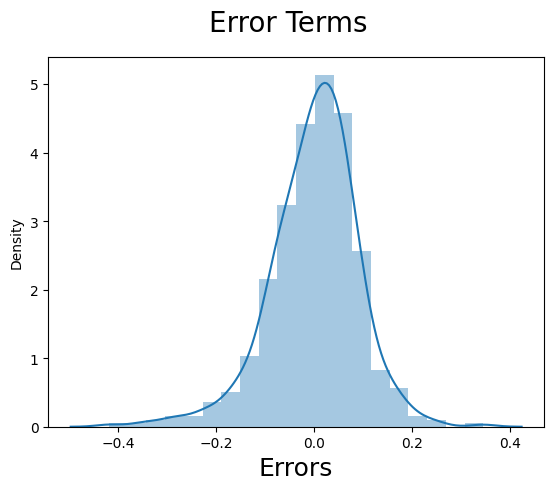

In [114]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()

**Inference:**

 We can clearly see that the error terms are centred around 0 and follows a normal distribution, this is in accordance with the stated assumptions of linear regression.

#Cross-verifying the above conclusion using a QQ-plot as well:

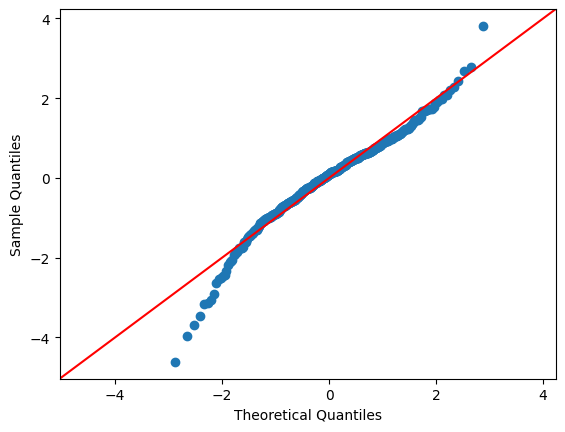

In [115]:
# Plot the qq-plot of the error terms

sm.qqplot((y_train - y_train_pred), fit=True, line='45')
plt.show()

**Inference:**

Here we see that most of the data points lie on the straight line , which indicates that the error terms are normally distributed .

#Step 8: Making Predictions Using the Final Model
Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model that we got.

Applying the scaling on the test sets

In [116]:
num_vars = ['cnt','hum','windspeed','temp','atemp']

X_test[num_vars] = scaler.transform(X_test[num_vars])

In [117]:
X_test.describe()

,season_Spring,season_Summer,season_Winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.254545,0.263636,0.236364,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,...,0.027273,0.318182,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154
std,0.436599,0.441609,0.425817,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,...,0.163248,0.466833,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300


In [118]:
#Dividing into X_test and y_test
y_test = X_test.pop('cnt')

In [119]:
# Making predictions using the final model

X_test = sm.add_constant(X_test[X_train_rfe.columns])
y_test_pred = lmodel_4.predict(X_test)

**Calculating the r-squared**

R-squared measures the strength of the relationship between your model and the dependent variable on a convenient 0 – 100% scale.

In [120]:
from sklearn.metrics import r2_score
print('r2_score of train dataset', r2_score(y_train, y_train_pred))
print('r2_score of test dataset', r2_score(y_test, y_test_pred))

r2_score of train dataset 0.8367828175631212
r2_score of test dataset 0.8025684920603356


**Inference:**

We can see that the r_squared on the test set is 0.8025 and the r-squared on the trained set 0.836 which is quiet reasonable and nearly equal, which means that whatever data the model was trained with, it has been almost able to apply those learnings in the test data.

#Step 9: Model Evaluation
Plotting the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

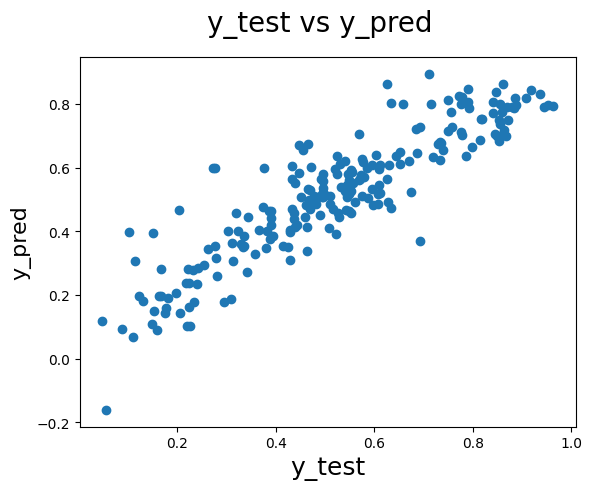

In [121]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

Inference:

We can conclude that the final model fit isn't by chance, and has descent predictive power.

Getting the variable names and the coefficient values for the final equation of the best fitted line

In [123]:
param = pd.DataFrame(lmodel_4.params)
param.insert(0,'Variables',param.index)
param.rename(columns = {0:'Coefficient value'},inplace = True)
param['index'] = list(range(0,13))
param.set_index('index',inplace = True)
param.sort_values(by = 'Coefficient value',ascending = False,inplace = True)
param

,Variables,Coefficient value
index,,
11,temp,0.472115
9,yr,0.234283
0,const,0.215392
6,mnth_sept,0.076399
3,season_Winter,0.075655
2,season_Summer,0.043385
4,mnth_jan,-0.038259
5,mnth_jul,-0.050347
1,season_Spring,-0.061696


In [122]:
round(lmodel_4.params,4)

const                           0.2154
season_Spring                  -0.0617
season_Summer                   0.0434
season_Winter                   0.0757
mnth_jan                       -0.0383
mnth_jul                       -0.0503
mnth_sept                       0.0764
weathersit_Light Snow & Rain   -0.2854
weathersit_Mist & Cloudy       -0.0793
yr                              0.2343
holiday                        -0.0968
temp                            0.4721
windspeed                      -0.1549
dtype: float64

Final Conclusions :
By using the above scatter plot and the table , We can see that the equation of our best fitted line is:

**cnt = 0.2154 - 0.0671 * season_Spring +0.0434 * season_Summer +0.0757 * season_Winter - 0.0383 * mnth_jan -0.0503 * mnth_jul + 0.0764 * mnth_sept - 0.2857 * weathersit_Light Snow & Rain - 0.2854 *
weathersit_Mist & Cloudy + 0.2343 * yr - 0.0968 * holiday + 0.4721 *  temp - 0.1549 * windspeed**                    
                  

All the positive coefficients like temp,season_Summer indicate that an increase in these values will lead to an increase in the value of cnt. All the negative coefficients indicate that an increase in these values will lead to a decrease in the value of cnt.

From R-Sqaured and adj R-Sqaured value of both train and test dataset we could conclude that the above variables can well explain more than 83% of bike demand.

Coeffiencients of the variables explains the factors effecting the bike demand

Based on final model top three features contributing significantly towards explaining the demand are:

Temperature (0.472115)

mnth_sept   (0.0764)

year (0.234283)

**Hence, it can be clearly concluded that the variables temperature , season/ weather situation,yr and month are significant in predicting the demand for shared bikes**.

#Final Recommendations for the Company:

The month of sep should be considered by the company as they have a higher demand as compared to other months.

With an increase in temperature the demand also increases, hence it should keep track of the weather conditions.

During the Winter season the demand rises, hence it should be well prepared to meet the high demand.

Holiday time seems to be least interesting bor biking, little motavation and marketing might help here.